## File : Exercise 8-2_Edris_Safari.ipynb
## Name:Edris Safari
## Date:1/20/2019
## Course: DSC530 - Data Exploration and Analysis
## Desc: Week7 exercise 8-2 assignment

Suppose that you draw a sample with size  from an exponential distribution with . Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval. Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [ ]:
from __future__ import print_function, division

import thinkstats2
import thinkplot

import math
import random
import numpy as np

In [14]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)


def SimulateSample(lam=2, n=10, m=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    m: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('for number of samples = ' + str(n) + ', standard error = ', str(stderr))

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    print('confidence interval gap', ci[1]-ci[0])
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.show()
    return


for number of samples = 10, standard error =  0.844665632255641
confidence interval (1.28790559210571, 3.6883949077364537)
confidence interval gap 2.4004893156307436


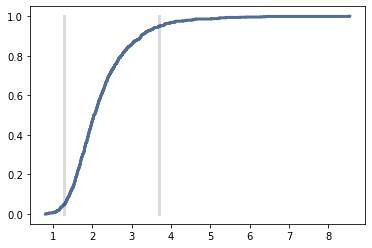

for number of samples = 100, standard error =  0.20971530325545146
confidence interval (1.7033795016677402, 2.3867359847887526)
confidence interval gap 0.6833564831210124


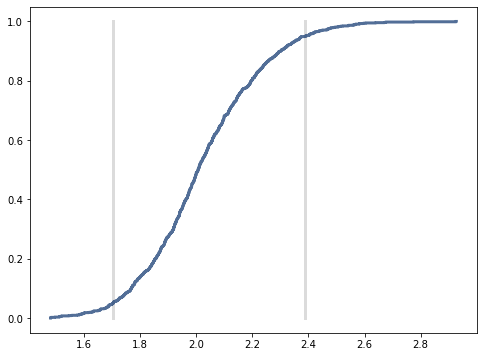

for number of samples = 1000, standard error =  0.06570904037741487
confidence interval (1.8966261922728105, 2.1149749446763413)
confidence interval gap 0.2183487524035308


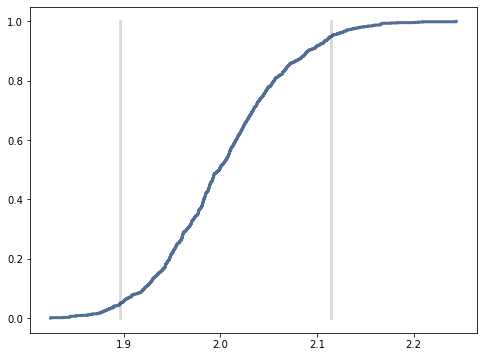

<Figure size 576x432 with 0 Axes>

In [15]:
for n in [10, 100, 1000]:
    SimulateSample(n=n)
    

As number of sample increase the gap in confidence interval decreases. The standard error follows the same pattern.